# IMPORTING ALL THE RELEVANT FILES & CLEANING DATA

## Here we import relevant files. Some of the basic EDA & Cleaning data that we perform here are
### 1) We are going to import the file as io_liq & after initial cleaning use liq_data for further analysis

- Drop NA values
- Remove \$ sign from all columns containing $
- We calculate profit
- Convert all city/county names to Uppercase (to avoid case conflicts)
- Fix date time & add column for year & quarter (for future sorting)
- Fix GUTTENBERG & GUTTENBURG.

In [768]:
%%time
# Importing all the necessary libraries for this project.

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import datetime
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import statsmodels.api as sm
from sklearn import metrics


# Time to Import the CSV & convert it into a DataFrame

#io_liq = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv", error_bad_lines=False)

io_liq = pd.read_csv("iowa_liquor_sales_proj_2.csv", error_bad_lines=False, low_memory=False)
io_liq = io_liq.drop(["Invoice/Item Number", "Address", "Store Location", "Pack", "Vendor Name", "Store Name"], axis = 1, errors = "Ignore")

#Remove all Rows with data with Null/NA values. This will help us work with numbers.

io_liq = io_liq.dropna(axis = 0)


#Remove the $ and convert to Floats to give capability of adding/subtracting. Here we are removing Char#1 
def remove_dollar(x):
    return float(x.replace('$', ''))

io_liq["Bottle Cost_Dollars"] = io_liq["State Bottle Cost"].apply(remove_dollar)
io_liq["Bottle Retail_Dollars"] = io_liq["State Bottle Retail"].apply(remove_dollar)
io_liq["Sale_Dollars"] = io_liq["Sale (Dollars)"].apply(remove_dollar)

##io_liq["Sale_Dollars"] = io_liq["Sale (Dollars)"].apply(lambda x: float(x[1:])) <-- lambda way of doing it 

#Calculate the Profit here
io_liq["Profit_Dollars"] = (io_liq["Bottle Retail_Dollars"] - io_liq["Bottle Cost_Dollars"])*io_liq["Bottles Sold"]


#FIX City Names

io_liq["CityName"] = io_liq["City"].apply(lambda x: x.upper())
io_liq["CountyName"] = io_liq["County"].apply(lambda x: x.upper())


# Fix the column date types

io_liq["Date"] = pd.to_datetime(io_liq["Date"], format="%m/%d/%Y", errors = "ignore")
io_liq["Year"] = io_liq["Date"].dt.year.astype(str)
io_liq["Month"] = io_liq["Date"].dt.month.astype(str)


def ceiling_quarter(x):
    return str(math.ceil(x))
    
    
io_liq["Q#"] = (io_liq["Date"].dt.month/3)
io_liq['Quarter'] = io_liq['Q#'].apply(ceiling_quarter)



#Remove Repeat Columns here
liq_data = io_liq.drop(["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)", "City", "County", "Q#"], axis = 1)

# Fix County#
liq_data["County Number"] = liq_data["County Number"].astype(int)
liq_data["Category"] = liq_data["Category"].astype(int)

CPU times: user 48.7 s, sys: 5.77 s, total: 54.5 s
Wall time: 55.6 s


In [770]:
# Let us understand the datatypes, the column types and other basic information about the table

liq_data.dtypes

Date                     datetime64[ns]
Store Number                      int64
Zip Code                         object
County Number                     int64
Category                          int64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
Bottles Sold                      int64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
Bottle Cost_Dollars             float64
Bottle Retail_Dollars           float64
Sale_Dollars                    float64
Profit_Dollars                  float64
CityName                         object
CountyName                       object
Year                             object
Month                            object
Quarter                          object
dtype: object

In [771]:
liq_data.shape

(2692602, 22)

In [772]:
#City has some spelling mistakes. Let us group store numbers and cities together and find all duplicate store numbers once unique
#The same store cannot be in two places @ the same time

#Thank you Chris Albon - https://chrisalbon.com/python/pandas_delete_duplicates.html

clean_city = liq_data[["CityName", "Store Number"]].sort_values("Store Number")
cleaner_city = clean_city.drop_duplicates()

cleaner_city[cleaner_city["Store Number"].duplicated()] #THIS SPITS OUT 3782 telling it is duplicated

clean_city[clean_city["Store Number"]==3782]

# ##GUTTENBURG needs some fixing

# # FIX City Name




,CityName,Store Number
873902,GUTTENBURG,3782
2555021,GUTTENBERG,3782
2555005,GUTTENBERG,3782
2347852,GUTTENBERG,3782
1026592,GUTTENBURG,3782
2555020,GUTTENBERG,3782
2189115,GUTTENBERG,3782
363482,GUTTENBURG,3782
2345346,GUTTENBERG,3782
2394677,GUTTENBERG,3782


In [773]:
liq_data["CityName"] = liq_data["CityName"].replace("GUTTENBURG", "GUTTENBERG")

In [774]:
liq_data.shape

(2692602, 22)

In [775]:
#Testing some sorting techniques

liq_data[(liq_data["CityName"] == "GUTTENBERG") & (liq_data["Category Name"] == "VODKA 80 PROOF") & (liq_data["Bottle Cost_Dollars"]==9.25)]

,Date,Store Number,Zip Code,County Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),...,Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName,Year,Month,Quarter
308651,2015-06-15,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.26,9.25,13.88,13.88,4.63,GUTTENBERG,CLAYTON,2015,6,2
324538,2015-07-27,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.26,9.25,13.88,13.88,4.63,GUTTENBERG,CLAYTON,2015,7,3
427312,2015-07-20,4672,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,1.59,9.25,13.88,83.28,27.78,GUTTENBERG,CLAYTON,2015,7,3
431205,2015-03-02,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,3,1
519133,2015-07-27,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,7,3
889224,2015-09-28,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,1.59,9.25,13.88,83.28,27.78,GUTTENBERG,CLAYTON,2015,9,3
971393,2015-07-13,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.79,9.25,13.88,41.64,13.89,GUTTENBERG,CLAYTON,2015,7,3
1040015,2015-05-04,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,5,2
1197058,2015-08-24,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.79,9.25,13.88,41.64,13.89,GUTTENBERG,CLAYTON,2015,8,3
1197490,2015-09-14,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,9,3


In [776]:
def eda(dataframe):
    #EDA thanks to Ritika Bhasker
    
    print("missing values \n", dataframe.isnull().sum(), '\n')
    print("dataframe index \n", dataframe.index, '\n')
    print("dataframe types \n", dataframe.dtypes, '\n')
    print("dataframe shape \n", dataframe.shape, '\n')
    print("dataframe describe \n", dataframe.describe(include='all'), '\n')

eda(liq_data)

missing values 
 Date                     0
Store Number             0
Zip Code                 0
County Number            0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
Bottles Sold             0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
Bottle Cost_Dollars      0
Bottle Retail_Dollars    0
Sale_Dollars             0
Profit_Dollars           0
CityName                 0
CountyName               0
Year                     0
Month                    0
Quarter                  0
dtype: int64 

dataframe index 
 Int64Index([      6,       8,      13,      18,      21,      25,      29,
                 38,      42,      50,
            ...
            2709542, 2709543, 2709544, 2709545, 2709546, 2709547, 2709548,
            2709549, 2709550, 2709551],
           dtype='int64', length=2692602) 

dataframe types 
 Date                     datetime64[ns]
Store Num

In [845]:
liq_data.head(5)

,Date,Store Number,Zip Code,County Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),...,Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName,Year,Month,Quarter
6,2015-11-09,2538,50702,7,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,...,2.38,11.62,17.43,104.58,34.86,WATERLOO,BLACK HAWK,2015,11,4
8,2015-11-30,2662,52761,70,1701100,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,...,0.79,19.58,29.37,117.48,39.16,MUSCATINE,MUSCATINE,2015,11,4
13,2015-11-11,3650,51025,47,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,...,0.40,11.62,17.43,17.43,5.81,HOLSTEIN,IDA,2015,11,4
18,2015-11-18,3723,51040,67,1081200,CREAM LIQUEURS,305,258,"Rumchata ""GoChatas""",6000,...,1.59,99.00,148.50,148.50,49.50,ONAWA,MONONA,2015,11,4
21,2015-11-23,2642,50219,63,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,...,2.38,11.62,17.43,104.58,34.86,PELLA,MARION,2015,11,4


# SOME EXPLORATORY PLOTS TO UNDERSTAND DATA DISTRIBUTION

## These are not very important but helps me visualize the data & the how it is arranged. Plus it helps me get comfortable with data manipulation/sorting etc. :)

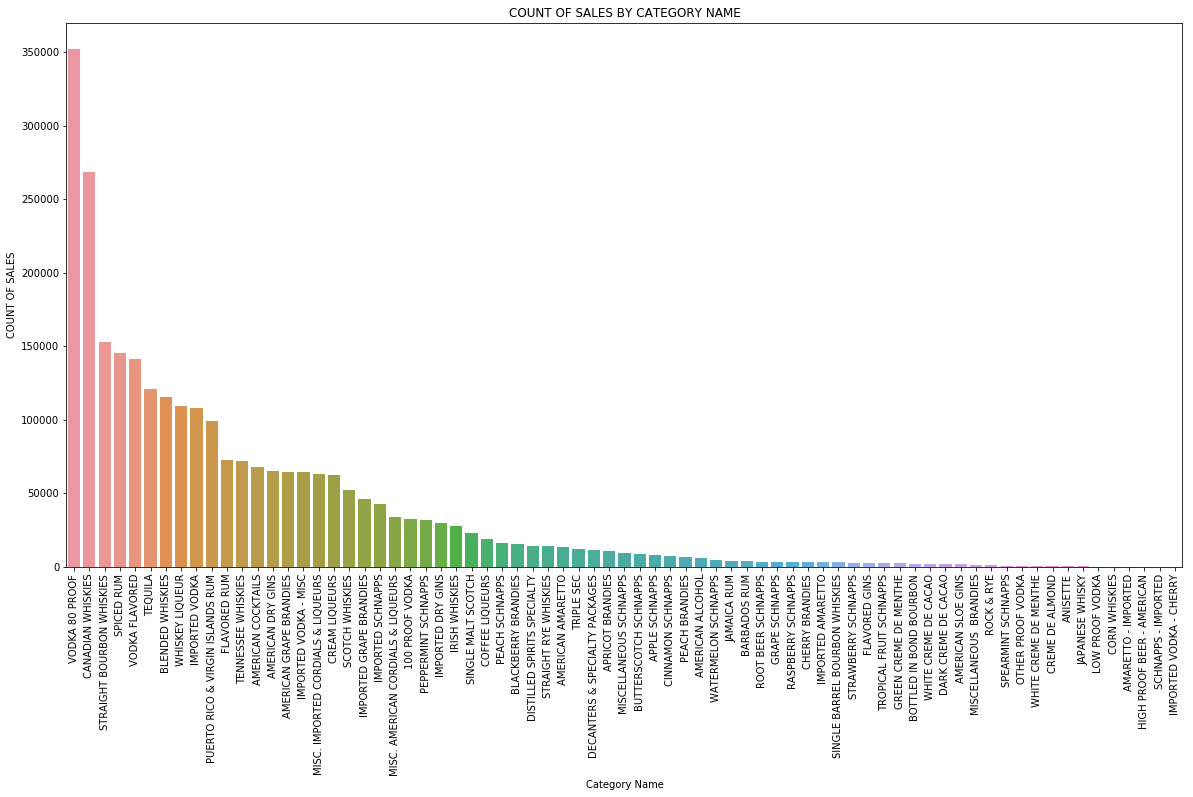

In [779]:
#Let us try to understand how are the sales distributed! What is the order of sales by category name? Top100 all time?

#EDA

rcParams['figure.figsize'] = 20, 10

plt.xticks(rotation=90)
category_plot = sns.countplot(x = "Category Name", data = liq_data, order = liq_data["Category Name"].value_counts().nlargest(100).index ,orient = "v")
plt.ylabel("COUNT OF SALES")
plt.title("COUNT OF SALES BY CATEGORY NAME")

plt.show()

# Hmmm...Vodka 80 Proof is the most common liquor sold.

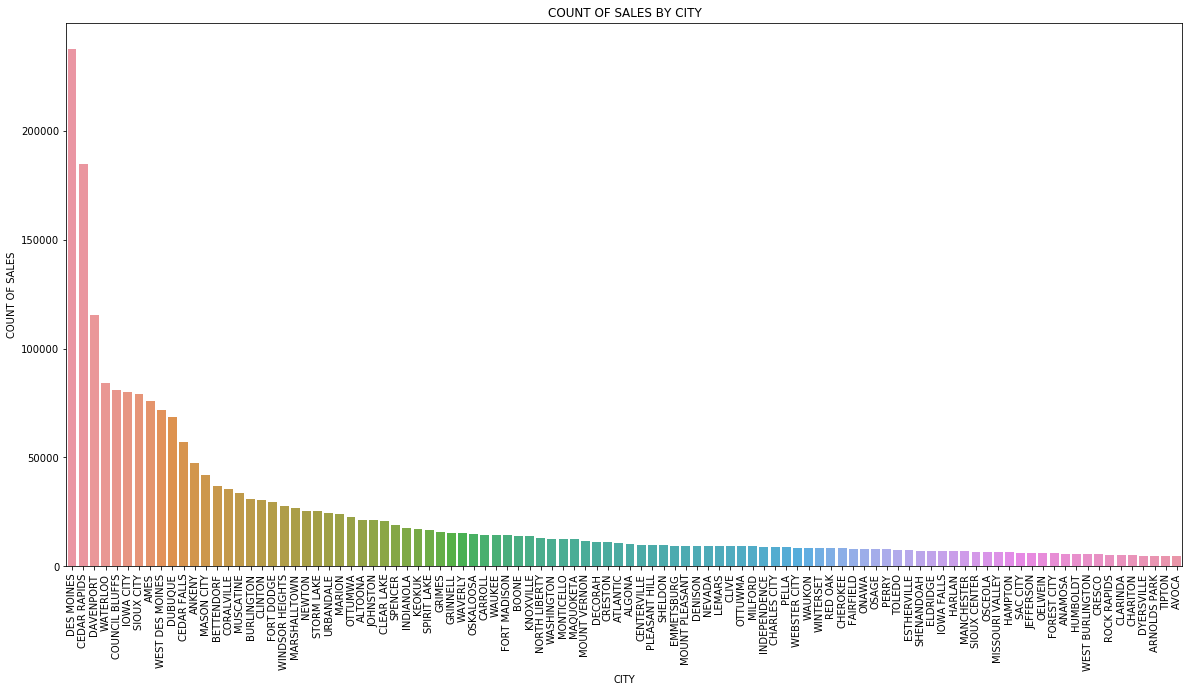

In [780]:
#Let us try to understand how are the sales distributed by city! What is the order of sales by City name?

#EDA

rcParams['figure.figsize'] = 20, 10

plt.xticks(rotation=90)
category_plot = sns.countplot(x = "CityName", data = liq_data, order = liq_data["CityName"].value_counts().nlargest(100).index ,orient = "v")
plt.ylabel("COUNT OF SALES")
plt.xlabel("CITY")
plt.title("COUNT OF SALES BY CITY")

plt.show()

# DesMoines has the most amount of liquor sold

# HERE WE WILL BE FINDING NUMBER OF STORES

# <span style="color:red">** I AM USING STORE #5205 as a sanity check for all groupbys statements</span>

### Number of stores/city. I split the task into two parts. First part was to get a total Sale, Profit, Bottles PER City | Store | County | Zip |  for all the stores

In [781]:
sales = liq_data.groupby(["Quarter", "Year", "Month", "CityName", "County Number", "Zip Code", "Store Number", "Item Number", "Category Name", "Bottle Cost_Dollars", "CountyName"], as_index = False)["Sale_Dollars", "Profit_Dollars", "Bottles Sold", "Volume Sold (Liters)"].sum().sort_values(["CityName"])
sales[sales["Store Number"]==5205]


,Quarter,Year,Month,CityName,County Number,Zip Code,Store Number,Item Number,Category Name,Bottle Cost_Dollars,CountyName,Sale_Dollars,Profit_Dollars,Bottles Sold,Volume Sold (Liters)
412760,1,2016,1,GLIDDEN,14,51443,5205,10550,CANADIAN WHISKIES,6.75,CARROLL,10.13,3.38,1,0.75
412776,1,2016,1,GLIDDEN,14,51443,5205,40411,VODKA FLAVORED,6.50,CARROLL,9.75,3.25,1,0.75
412775,1,2016,1,GLIDDEN,14,51443,5205,38176,VODKA 80 PROOF,9.65,CARROLL,14.48,4.83,1,0.75
412774,1,2016,1,GLIDDEN,14,51443,5205,37997,VODKA 80 PROOF,9.25,CARROLL,166.56,55.56,12,12.00
412773,1,2016,1,GLIDDEN,14,51443,5205,37418,VODKA 80 PROOF,8.50,CARROLL,25.50,8.50,2,3.50
412772,1,2016,1,GLIDDEN,14,51443,5205,37217,VODKA 80 PROOF,4.25,CARROLL,12.76,4.26,2,2.00
412771,1,2016,1,GLIDDEN,14,51443,5205,34061,IMPORTED VODKA - MISC,11.49,CARROLL,51.72,17.25,3,2.25
412770,1,2016,1,GLIDDEN,14,51443,5205,34030,IMPORTED VODKA - MISC,11.49,CARROLL,51.72,17.25,3,2.25
412769,1,2016,1,GLIDDEN,14,51443,5205,30056,AMERICAN DRY GINS,3.32,CARROLL,29.88,9.96,6,4.50
412768,1,2016,1,GLIDDEN,14,51443,5205,19066,STRAIGHT BOURBON WHISKIES,10.49,CARROLL,31.48,10.50,2,1.50


In [782]:
## CREATING TWO DATAFRAMES. ONE WITH NUMBER OF STORES/CITY. OTHER WITH CITY NAMES & THEN JOINING THEM.

number_stores = pd.DataFrame(sales.groupby(["CityName"], as_index = False)["Store Number"].nunique())
cities = pd.DataFrame(sales["CityName"].unique())


city_store = pd.concat([cities, number_stores], axis = 1)
city_store.columns = ["CityName", "# of Stores_City"]

In [803]:
city_store

,CityName,# of Stores_City
0,ACKLEY,2
1,ADAIR,2
2,ADEL,3
3,AFTON,1
4,AKRON,1
5,ALBIA,2
6,ALDEN,2
7,ALGONA,3
8,ALLISON,2
9,ALTA,1


In [784]:
liq_data.iloc[:,4:19,].head()

,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName
6,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,6,9.0,2.38,11.62,17.43,104.58,34.86,WATERLOO,BLACK HAWK
8,1701100,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,4,3.0,0.79,19.58,29.37,117.48,39.16,MUSCATINE,MUSCATINE
13,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,1,1.5,0.40,11.62,17.43,17.43,5.81,HOLSTEIN,IDA
18,1081200,CREAM LIQUEURS,305,258,"Rumchata ""GoChatas""",6000,1,6.0,1.59,99.00,148.50,148.50,49.50,ONAWA,MONONA
21,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,6,9.0,2.38,11.62,17.43,104.58,34.86,PELLA,MARION


In [806]:
liq_data.iloc[:,4:19,][(liq_data["Store Number"] == 5205)&(liq_data["Year"]=="2015")]

,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName
1960608,1012200,SCOTCH WHISKIES,260,5290,J & B Rare Scotch,750,1,0.75,0.20,12.25,18.38,18.38,6.13,GLIDDEN,CARROLL
1968398,1012100,CANADIAN WHISKIES,260,10807,Crown Royal Regal Apple,750,2,1.50,0.40,15.00,22.50,45.00,15.00,GLIDDEN,CARROLL
1972027,1012100,CANADIAN WHISKIES,260,11296,Crown Royal,750,2,1.50,0.40,15.00,22.50,45.00,15.00,GLIDDEN,CARROLL
1977333,1012100,CANADIAN WHISKIES,115,11774,Black Velvet,375,2,0.75,0.20,3.07,4.61,9.22,3.08,GLIDDEN,CARROLL
1978061,1012100,CANADIAN WHISKIES,115,11776,Black Velvet,750,4,3.00,0.79,5.23,7.85,31.40,10.48,GLIDDEN,CARROLL
1981658,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,6,10.50,2.77,9.70,14.93,89.58,31.38,GLIDDEN,CARROLL
1982998,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,6,10.50,2.77,9.70,14.93,89.58,31.38,GLIDDEN,CARROLL
1984966,1012100,CANADIAN WHISKIES,85,12467,Canadian Mist Whisky,1000,5,5.00,1.32,7.22,10.83,54.15,18.05,GLIDDEN,CARROLL
1995855,1011200,STRAIGHT BOURBON WHISKIES,65,19066,Jim Beam,750,2,1.50,0.40,10.49,15.74,31.48,10.50,GLIDDEN,CARROLL
1998508,1011200,STRAIGHT BOURBON WHISKIES,65,19477,Maker's Mark,1000,1,1.00,0.26,22.04,33.06,33.06,11.02,GLIDDEN,CARROLL


In [807]:
liq_data.shape

(2692602, 22)

# LIQUOR SALE FOR EACH STORE FOR 2015

### LIQUOR TYPE INFO.

ONE OF THE MOST COMMON THING THAT MIGHT AFFECT TOTAL SALE IS THE PRICE OF MOST SOLD LIQUOR. PRICE OF MOST EXPENSIVE LIQUOR AND PRICE OF CHEAPEST LIQUOR. LET US FIND OUT WHAT THAT IS. TO FIND OUT THE PRICE OF THE MOST EXPENSIVE LIQUOR -- WE FIND OUT THE MAX(SUM) OF EACH LIQUOR AND THEN FIGURE OUT THE TOTAL SALE OF EACH OF THAT

## OTHER REVLEVANT TABLES

In [809]:
#Liquor Inventory/Sale/ Quarter

inventory_numbers = liq_data.groupby(["Store Number", "Year", "Quarter", "Month"], as_index = False)[["Category", "Vendor Number", "Item Number"]].count()
inventory_numbers.columns = ["Store Number", "Year", "Quarter", "Month", "Number of Categories", "Number of Vendors", "Number of Items"]
inventory_numbers[(inventory_numbers["Store Number"]==5205)]

,Store Number,Year,Quarter,Month,Number of Categories,Number of Vendors,Number of Items
18332,5205,2015,4,12,45,45,45
18333,5205,2016,1,1,46,46,46
18334,5205,2016,1,2,44,44,44
18335,5205,2016,1,3,36,36,36


In [787]:
## Max Monthly Sales

liquor_max = liq_data.groupby(["Store Number", "Year", "Quarter", "Month"], as_index=False)["Bottle Retail_Dollars", "Sale_Dollars", "Profit_Dollars"].max()
liquor_max.columns = ["Store Number", "Year", "Quarter", "Month", "Bottle_Max$", "Bottle_MaxSale$", "Profit_MaxSale$"]

liquor_max[(liquor_max["Store Number"]==5205)]

## Avg Monthly Sales

liquor_avg = liq_data.groupby(["Store Number", "Year", "Quarter", "Month"], as_index=False)["Bottles Sold", "Bottle Retail_Dollars", "Sale_Dollars", "Profit_Dollars"].mean()
liquor_avg.columns = ["Store Number", "Year", "Quarter", "Month","Avg_#Bottle_Sold", "Bottle_AvgPrice$", "Bottle_AvgSale$", "Profit_AvgSale$"]

## Monthly Total Sales

monthly_sales = liq_data.groupby(["Store Number", "Year", "Quarter", "Month"], as_index=False)["Bottles Sold", "Sale_Dollars"].sum()
monthly_sales.columns = ["Store Number", "Year", "Quarter", "Month","Total_Bottles_Sold", "Total_Sale$"]

monthly_sales[(monthly_sales["Store Number"]==5205)]


liquor_metric = pd.merge(liquor_max, liquor_avg, how = "inner", on = ["Store Number", "Year", "Quarter", "Month"])
liquor_metric = pd.merge(liquor_metric, monthly_sales, how = "inner", on = ["Store Number", "Year", "Quarter", "Month"])
liquor_metric = pd.merge(liquor_metric, inventory_numbers, how = "inner", on = ["Store Number", "Year", "Quarter", "Month"])

liquor_metric[(liquor_metric["Store Number"]==5205)]



,Store Number,Year,Quarter,Month,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,Profit_AvgSale$,Total_Bottles_Sold,Total_Sale$,Number of Categories,Number of Vendors,Number of Items
18332,5205,2015,4,12,33.06,211.56,70.56,2.644444,13.386667,36.800667,12.383778,119,1656.03,45,45,45
18333,5205,2016,1,1,22.50,166.56,55.56,2.521739,12.102609,29.649130,9.921087,116,1363.86,46,46,46
18334,5205,2016,1,2,44.58,135.00,45.00,2.250000,14.085682,32.136591,10.790455,99,1414.01,44,44,44
18335,5205,2016,1,3,34.12,189.00,63.00,2.583333,12.827222,35.618889,11.895556,93,1282.28,36,36,36


In [810]:
## ALL FIXED METRICS OF A STORE.

liq_fixed = liq_data[["Zip Code", "CityName", "Store Number", "CountyName"]].drop_duplicates()
liq_fixed.shape

(1380, 4)

In [811]:
# Adding Zip, City, County etc etc to the sales_year_store table

sales_all = pd.merge(liquor_metric, liq_fixed, how='left', on = "Store Number", sort = "Store Number")

sales_all[sales_all["Store Number"] == 5205]

sales_all_store = pd.merge(sales_all, city_store, how = "left", on = "CityName", sort = "Store Number")

sales_all_store[sales_all_store["Store Number"] == 5205]

sales_all_store.shape

(18423, 20)

# IMPORT OTHER CSV FILES - POPULATION
### HERE WE ARE GOING TO IMPORT POPULATION CSV DATA AND SEE HOW DOES IT LOOK AFTER MERGING
### BUT FIRST. SOME EDA

DATA FOUND HERE:- https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

In [812]:
#IOWA POP INFO. #THANKS CHRIS MESSIER FOR THIS DATA. ALSO FOUND ON FACTFINDER.CENSUS 

io_pop = pd.read_csv("iowa_total_population.csv")
io_pop.dtypes

io_pop = io_pop.dropna(axis = 0)

In [813]:
io_pop["Pop_Date"] = pd.to_datetime(io_pop["Year"], format="%B %d %Y")
io_pop["CountyName"] = io_pop["County"].apply(lambda x: x.upper())

def remove_county(x):
    return x.replace(' COUNTY', '')

io_pop["CountyName"] = io_pop["CountyName"].apply(remove_county)
io_pop["Year_Name"] = (io_pop["Pop_Date"].dt.year).astype(int)


In [814]:
io_pop.head(5)

,FIPS,County,Year,Population,Primary County Coordinates,Pop_Date,CountyName,Year_Name
0,19001,Adair County,July 01 2015,7228,"(41.3307464, -94.4709413)",2015-07-01,ADAIR,2015
1,19001,Adair County,July 01 2009,7350,"(41.3307464, -94.4709413)",2009-07-01,ADAIR,2009
2,19001,Adair County,July 01 2014,7417,"(41.3307464, -94.4709413)",2014-07-01,ADAIR,2014
3,19001,Adair County,July 01 2013,7436,"(41.3307464, -94.4709413)",2013-07-01,ADAIR,2013
4,19001,Adair County,July 01 2008,7445,"(41.3307464, -94.4709413)",2008-07-01,ADAIR,2008


In [815]:
"""IOWA_POPULATION DATA. FILTERED TO SHOW ONLY 2015 DATA & NOT 2008/2001 DATA"""

io_pop_data = io_pop.drop(["FIPS", "County", "Year", "Pop_Date"], axis = 1)
io_pop_data

io_pop_data_2015 = io_pop_data[(io_pop_data["Year_Name"])==2015]

io_pop_data_2015[(io_pop_data_2015["CountyName"]=="CARROLL")]

io_pop_data_2015.columns = ["County_Pop", "County_XY", "CountyName", "Year_Name"]

### MERGE SALES + POPULATION DATA HERE

In [965]:
"""MERGE POPULATION WITH SALES DATA"""

sales_pop = pd.merge(sales_all_store, io_pop_data_2015, how = "left", on = "CountyName")
sales_pop = sales_pop.drop(["Year_Name"], axis = 1).sort_values("CityName")

sales_pop[sales_pop["Store Number"]==5205]

,Store Number,Year,Quarter,Month,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,...,Total_Sale$,Number of Categories,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY
8889,5205,2016,1,3,34.12,189.00,63.00,2.583333,12.827222,35.618889,...,1282.28,36,36,36,51443,GLIDDEN,CARROLL,2,20498,"(42.0362382, -94.8605593)"
8888,5205,2016,1,2,44.58,135.00,45.00,2.250000,14.085682,32.136591,...,1414.01,44,44,44,51443,GLIDDEN,CARROLL,2,20498,"(42.0362382, -94.8605593)"
8887,5205,2016,1,1,22.50,166.56,55.56,2.521739,12.102609,29.649130,...,1363.86,46,46,46,51443,GLIDDEN,CARROLL,2,20498,"(42.0362382, -94.8605593)"
8886,5205,2015,4,12,33.06,211.56,70.56,2.644444,13.386667,36.800667,...,1656.03,45,45,45,51443,GLIDDEN,CARROLL,2,20498,"(42.0362382, -94.8605593)"


In [800]:
sales_pop.shape

(18423, 22)

# IMPORT OTHER CSV FILES - INCOME

### Let us add income data to the mix as well

DATA FOUND HERE:- https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

In [817]:
io_income = pd.read_csv("iowa_income_city.csv", header = 1)

io_income = io_income.drop(["Id", "Id2"], axis = 1)

io_income.columns = ["City", "Median_IncomeHH", "Mean_IncomeHH"]

io_income["City"] = io_income["City"].apply(lambda x: x.upper())

io_income["CityName"] = io_income["City"].apply(lambda x: x.replace(" CITY, IOWA", ""))
io_income["CityName"] = io_income["CityName"].apply(lambda x: x.replace(", IOWA", ""))

io_income_2015 = io_income.drop(["City"], axis = 1)

## Dropping non-int values - https://stackoverflow.com/questions/39694192/convert-string-column-to-integer
io_income_2015 = io_income_2015[pd.to_numeric(io_income_2015["Median_IncomeHH"], errors='coerce').notnull()]
io_income_2015 = io_income_2015[pd.to_numeric(io_income_2015["Mean_IncomeHH"], errors='coerce').notnull()]

io_income_2015["Median_IncomeHH"] = io_income_2015["Median_IncomeHH"].astype(str).astype(int)
io_income_2015["Mean_IncomeHH"] = io_income_2015["Mean_IncomeHH"].astype(str).astype(int)


In [967]:
"""ADDING INCOME TO THE MAIN TABLE"""

sales_popinc = pd.merge(sales_pop, io_income_2015, how = "left", on = "CityName")

sales_popinc[sales_popinc["Store Number"]==5205]

sales_popinc = sales_popinc.dropna(axis = 0)

In [973]:
## TOTAL Annual Sales of Each store (Target Variable Y to test our Model)

total_annual_sales = sales_popinc.groupby(["Store Number", "Year"], as_index=False)["Store Number", "Year", "Total_Sale$"].sum()
total_annual_sales.columns = ["Store Number", "Year", "TotalAnnual_$"]
total_annual_sales

total_sales_2015 = total_annual_sales[(total_annual_sales["Year"]=="2015")]

master_sales_2015 = pd.merge(total_sales_2015, sales_popinc, how = "left", on = ["Store Number", "Year"])

master_sales.head()



,Store Number,Year,TotalAnnual_$,Quarter,Month,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
0,2106,2015,1433451.46,1,1,172.94,2538.72,846.72,19.435897,16.373538,...,390,390,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
1,2106,2015,1433451.46,1,3,172.94,2961.84,987.84,18.748815,16.021351,...,422,422,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
2,2106,2015,1433451.46,2,4,172.94,2538.72,846.72,19.785441,15.841762,...,522,522,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
3,2106,2015,1433451.46,2,5,224.99,3627.36,1209.60,19.661176,16.200565,...,425,425,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
4,2106,2015,1433451.46,2,6,150.00,3173.40,1058.40,19.260652,16.460727,...,399,399,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0


## So now, we have a datatable with Sales Data + Population Data + Income. Time to build some models to predict the sales!

### The project notes say that we have to use only the information from Q1 to build the model and test it on the remaining dates

### OUR MAIN TABLE TO WORK WITH IS MASTER_SALES. EVERYTHING HAS BEEN CONSOLIDATED UP UNTIL THIS POINT

In [822]:
master_sales.shape

(14551, 25)

In [823]:
master_sales

,Store Number,Year,TotalAnnual_$,Quarter,Month,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
0,2106,2015,1433451.46,1,1,172.94,2538.72,846.72,19.435897,16.373538,...,390,390,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
1,2106,2015,1433451.46,1,3,172.94,2961.84,987.84,18.748815,16.021351,...,422,422,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
2,2106,2015,1433451.46,2,4,172.94,2538.72,846.72,19.785441,15.841762,...,522,522,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
3,2106,2015,1433451.46,2,5,224.99,3627.36,1209.60,19.661176,16.200565,...,425,425,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
4,2106,2015,1433451.46,2,6,150.00,3173.40,1058.40,19.260652,16.460727,...,399,399,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
5,2106,2015,1433451.46,3,7,187.97,2608.80,870.00,19.158019,15.811792,...,424,424,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
6,2106,2015,1433451.46,3,8,195.00,2115.60,705.60,19.376658,16.373236,...,377,377,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
7,2106,2015,1433451.46,3,9,93.72,4069.80,1357.20,20.015306,15.162806,...,392,392,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
8,2106,2015,1433451.46,4,10,187.97,2698.80,900.00,20.698842,16.553224,...,518,518,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
9,2106,2015,1433451.46,4,11,202.88,3173.40,1058.40,19.393258,16.631770,...,356,356,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0


In [824]:
master_sales[(master_sales["Store Number"]==5205)]

,Store Number,Year,TotalAnnual_$,Quarter,Month,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
14504,5205,2015,1656.03,4,12,33.06,211.56,70.56,2.644444,13.386667,...,45,45,51443,GLIDDEN,CARROLL,2,20498,"(42.0362382, -94.8605593)",55625.0,59844.0


In [711]:
master_sales.dtypes

Store Number              int64
Year                     object
TotalAnnual_$           float64
Quarter                  object
Month                    object
Bottle_Max$             float64
Bottle_MaxSale$         float64
Profit_MaxSale$         float64
Avg_#Bottle_Sold        float64
Bottle_AvgPrice$        float64
Bottle_AvgSale$         float64
Profit_AvgSale$         float64
Total_Bottles_Sold        int64
Total_Sale$             float64
Number of Categories      int64
Number of Vendors         int64
Number of Items           int64
Zip Code                 object
CityName                 object
CountyName               object
# of Stores_City          int64
County_Pop                int64
County_XY                object
Median_IncomeHH         float64
Mean_IncomeHH           float64
dtype: object

In [826]:
master_sales_q1_2015 = master_sales[(master_sales["Year"]=="2015")&(master_sales["Quarter"]=="1")]

## DEFINE OUR DEPENDENT & INDEPENDENT VARIABLES HERE

### OUR TARGET VARIABLE/DEPENDENT VARIABLE IS THE TOTAL SALE OF EACH STORE FOR 2015

In [1045]:
y = master_sales_q1_2015["TotalAnnual_$"]

### OUR INPUT VARIABLES/INDEPENDENT VARIABLES ARE THE METRICS FOR EACH STORE FROM JAN-MAR/QUARTER1

In [953]:
pred_columns = ['Month', 'Bottle_Max$', 'Bottle_MaxSale$', 'Profit_MaxSale$', 'Avg_#Bottle_Sold', 'Bottle_AvgPrice$', 'Bottle_AvgSale$', 'Profit_AvgSale$','Total_Bottles_Sold', 'Total_Sale$', 'Number of Categories','Number of Vendors', 'Number of Items', '# of Stores_City', 'County_Pop', 'Median_IncomeHH', 'Mean_IncomeHH']
X = master_sales_q1_2015[pred_columns]
X = sm.add_constant(X)

X = pd.get_dummies(X)
X = X.drop('Month_1', 1)



### LET US START WITH JUST MLR & FIND R^2 + COEFFS

In [954]:
olsmodel = sm.OLS(y, X).fit() ## sm.OLS(output, input)
olspredictions = model.predict(X)

olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalAnnual_$   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     3988.
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        16:28:34   Log-Likelihood:                -47016.
No. Observations:                3580   AIC:                         9.407e+04
Df Residuals:                    3563   BIC:                         9.417e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.493e+04   1.81e+04     -0.826      0.409   -5.04e+04    2.05e+04
Bottle_Max$            400.7950     49.576      8.085      0.000     303.595     497.995
Bottle_MaxSale$        -58.0378     39.104     -1.484      0.138    -134.707      18.631
Profit_MaxSale$        125.5952    116.418      1.079      0.281    -102.656     353.847
Avg_#Bottle_Sold      -862.9124    727.897     -1.185      0.236   -2290.048     564.223
Bottle_AvgPrice$      -534.9609    881.809     -0.607      0.544   -2263.862    1193.941
Bottle_AvgSale$      -8962.9177   2742.164     -3.269      0.001   -1.43e+04   -3586.549
Profit_AvgSale$       2.749e+04   8213.240      3.347      0.001    1.14e+04    4.36e+04
Total_Bottles_Sold     -34.0440      7.198     -4.730      0.000     -48.156     -19.932
Total_Sale$             13.7185      0.420     32.634      0.000      12.894      14.543
Number of Categories    93.1654      7.472     12.469      0.000      78.516     107.815
Number of Vendors       93.1654      7.472     12.469      0.000      78.516     107.815
Number of Items         93.1654      7.472     12.469      0.000      78.516     107.815
# of Stores_City       189.2458    124.689      1.518      0.129     -55.223     433.714
County_Pop              -0.0237      0.025     -0.962      0.336      -0.072       0.025
Median_IncomeHH         -0.9096      0.523     -1.739      0.082      -1.935       0.116
Mean_IncomeHH            1.0243      0.434      2.360      0.018       0.173       1.875
Month_2               -2.64e+04   5158.937     -5.118      0.000   -3.65e+04   -1.63e+04
Month_3              -4.277e+04   5040.192     -8.486      0.000   -5.27e+04   -3.29e+04
==============================================================================
Omnibus:                     2430.978   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1118520.738
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                      89.503   Cond. No.                     9.60e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### TO IMPROVE THE MODEL, WE START WITH TEST/TRAIN SPLITS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

### TIME TO DO SOME LR ON OUR TEST/TRAIN SPLITS

In [ ]:
from sklearn.metrics import classification_report


linearmodel = linear_model.LinearRegression()

model = linearmodel.fit(X_train, y_train)
predictions = linearmodel.predict(X_test)

model.coef_


In [ ]:
sns.regplot(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Score:", model.score(X_test, y_test))

### OK SO OUR R^2 = 0.934. Let us improve on the score by some cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# FIND BEST CROSS VALIDATION

mean_score = []

for i in range(4,12):
    scores = cross_val_score(linearmodel, X_train, y_train, cv=i)
    predictions = cross_val_predict(linearmodel, X, y, cv=i)
    accuracy = metrics.r2_score(y, predictions)
    mean_score.append(accuracy)

    
# TO GET MAX VALUE OF LIST PYTHONIC WAY. -- https://stackoverflow.com/questions/6193498/pythonic-way-to-find-maximum-value-and-its-index-in-a-list
import operator
index, value = max(enumerate(mean_score), key=operator.itemgetter(1))

print("The Optimum # of Folds is " + str(index+4) + " & the optimum R^2 value after cross validation is " + str(value))

### TIME TO GET RID OF UNNECESSARY COEFFICIENTS AND MAKE A BETTER MODEL WITH REGULARIZATION

### WE WILL TRY LASSO REGRESSION HERE. FIND THE BEST ALPHA FIRST

In [997]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=6, normalize=True, random_state=42)
model5 = lassoregcv.fit(X_train, y_train)
print(lassoregcv.alpha_)


# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model5.score(X_test, y_test))

print(lassoregcv.coef_)

X_test.shape

39.8970002375
132529.720306
Score: 0.934243959849
[  0.00000000e+00   4.80874129e+02  -1.17232736e+01  -0.00000000e+00
  -1.39377741e+02   3.68666194e+01   0.00000000e+00   7.59838939e+02
   0.00000000e+00   1.11031416e+01   2.64725803e+02   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   6.32009120e-02  -1.49540159e+04  -3.68542944e+04]


(895, 19)

In [961]:
def coeff_list(coef_,X):

    """FUNCTION TO PRINT VARIABLE & COEFF_ IN A DATAFRAME"""
    coeffs = pd.DataFrame(coef_)
    column_list = pd.DataFrame(X.dtypes.index)
    coeff_list = pd.concat([coeffs, column_list], axis = 1)

    coeff_list.columns = ["Coefficient", "Variable"]
    return coeff_list

coeff_list = coeff_list(lassoregcv.coef_, X)
coeff_list[(coeff_list["Coefficient"]!=0)]


,Coefficient,Variable
1,480.874129,Bottle_Max$
2,-11.723274,Bottle_MaxSale$
4,-139.377741,Avg_#Bottle_Sold
5,36.866619,Bottle_AvgPrice$
7,759.838939,Profit_AvgSale$
9,11.103142,Total_Sale$
10,264.725803,Number of Categories
16,0.063201,Mean_IncomeHH
17,-14954.015893,Month_2
18,-36854.294418,Month_3


### LET US MAKE SOME PREDICTIONS USING 2016 DATA

In [993]:
## Let us collect the 2016 data here.
master_2016 = sales_popinc[(sales_popinc["Year"]=="2016")]

total_sales_2016 = total_annual_sales[(total_annual_sales["Year"]=="2016")]

master_sales_2016 = pd.merge(total_sales_2016, sales_popinc, how = "left", on = ["Store Number", "Year"])

master_sales_2016 = master_sales_2016.drop("TotalAnnual_$", axis= 1)



In [1043]:
master_sales_2016

,Store Number,Year,Quarter,Month,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
0,2106,2016,1,1,225.57,2237.76,745.92,17.944304,15.813544,260.618456,...,395,395,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
1,2106,2016,1,2,150.00,2797.20,932.40,20.074271,15.219761,280.161353,...,377,377,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
2,2106,2016,1,3,149.99,2538.72,846.72,19.610989,16.041033,283.256462,...,455,455,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
3,2113,2016,1,1,44.51,337.56,112.56,4.078740,16.548976,56.652913,...,127,127,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
4,2113,2016,1,3,44.51,337.56,112.56,4.200000,15.640667,50.603273,...,165,165,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
5,2113,2016,1,2,44.51,337.56,112.56,4.949495,15.340404,61.806768,...,99,99,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
6,2130,2016,1,3,49.49,13233.60,4411.20,18.493917,15.163698,287.310973,...,411,411,50703,WATERLOO,BLACK HAWK,46,133455,"(42.4700957, -92.3088197)",41933.0,53120.0
7,2130,2016,1,1,47.99,4587.96,1530.00,17.451104,15.036309,263.349401,...,317,317,50703,WATERLOO,BLACK HAWK,46,133455,"(42.4700957, -92.3088197)",41933.0,53120.0
8,2130,2016,1,2,74.96,13233.60,4411.20,21.772277,15.198053,337.993795,...,303,303,50703,WATERLOO,BLACK HAWK,46,133455,"(42.4700957, -92.3088197)",41933.0,53120.0
9,2152,2016,1,2,33.75,211.56,70.56,3.669903,13.968544,44.502524,...,103,103,50469,ROCKWELL,CERRO GORDO,1,43017,"(43.0815577, -93.2608184)",53421.0,60890.0


In [1046]:
X_2016_test = master_sales_2016[pred_columns]

X_2016_test = sm.add_constant(X_2016_test)

X_2016_test = pd.get_dummies(X_2016_test)
X_2016_test = X_2016_test.drop('Month_1', 1)

X_2016_test.shape

y_2016_pred = lassoregcv.predict(X_2016_test)

y_2016 = pd.DataFrame(y_2016_pred)
y_2016

,0
0,1.369116e+06
1,1.340883e+06
2,1.601766e+06
3,1.193018e+05
4,1.037457e+05
5,8.620465e+04
6,1.296410e+06
7,1.018883e+06
8,1.140383e+06
9,6.274381e+04
